In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
from tensorflow.keras.datasets.mnist import load_data

In [14]:
(x_train, y_train), (x_test, y_test) = load_data()

In [15]:
np.max(x_train)

255

In [16]:
x_train = x_train / np.max(x_train)

In [17]:
x_test = x_test / np.max(x_test)

In [18]:
type(x_train)

numpy.ndarray

In [19]:
x_train.shape

(60000, 28, 28)

In [24]:
x_train = x_train.reshape(-1, 28, 28, 1)

In [25]:
x_test = x_test.reshape(-1, 28, 28, 1)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Activation, Flatten, MaxPooling2D

In [27]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64,activation='relu'))

model.add(Dense(10,activation='softmax'))

In [28]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [30]:
model.fit(x_train, y_train, batch_size=6000, epochs=10)

Epoch 1/10
10/10 [==============================] - 63s 6s/step - loss: 0.4651 - accuracy: 0.8626
Epoch 2/10
10/10 [==============================] - 63s 6s/step - loss: 0.3308 - accuracy: 0.9064
Epoch 3/10
10/10 [==============================] - 64s 6s/step - loss: 0.2518 - accuracy: 0.9265
Epoch 4/10
10/10 [==============================] - 62s 6s/step - loss: 0.1984 - accuracy: 0.9424
Epoch 5/10
10/10 [==============================] - 63s 6s/step - loss: 0.1621 - accuracy: 0.9534
Epoch 6/10
10/10 [==============================] - 62s 6s/step - loss: 0.1356 - accuracy: 0.9607
Epoch 7/10
10/10 [==============================] - 61s 6s/step - loss: 0.1170 - accuracy: 0.9656
Epoch 8/10
10/10 [==============================] - 61s 6s/step - loss: 0.1040 - accuracy: 0.9692
Epoch 9/10
10/10 [==============================] - 63s 6s/step - loss: 0.0936 - accuracy: 0.9725
Epoch 10/10
10/10 [==============================] - 62s 6s/step - loss: 0.0846 - accuracy: 0.9747


In [31]:
model.save('F:\\my project\\my project\\neural\\mnist_conv2d.model')

INFO:tensorflow:Assets written to: F:\my project\my project\neural\mnist_conv2d.model\assets


INFO:tensorflow:Assets written to: F:\my project\my project\neural\mnist_conv2d.model\assets


In [32]:
from tensorflow.keras.models import load_model

In [33]:
model2=load_model('F:\\my project\\my project\\neural\\mnist_conv2d.model')

In [34]:
model2.predict(x_test)

313/313 [==============================] - 4s 13ms/step


array([[5.1971181e-08, 7.6742451e-10, 3.5512916e-05, ..., 9.9994743e-01,
        1.6044099e-08, 3.2971132e-06],
       [1.7893411e-05, 5.9057743e-04, 9.9914575e-01, ..., 9.6015029e-10,
        9.9608260e-06, 5.4196800e-11],
       [5.5086648e-06, 9.9793434e-01, 6.3132917e-05, ..., 6.8385783e-04,
        1.3131229e-04, 3.0870617e-06],
       ...,
       [3.0560710e-08, 2.0202448e-07, 1.7012006e-07, ..., 4.9998256e-05,
        2.2358236e-05, 3.3307162e-05],
       [4.2791886e-04, 8.8704055e-06, 3.4853445e-06, ..., 1.7855815e-07,
        3.2575361e-02, 8.7638773e-06],
       [8.7997178e-06, 3.1596759e-10, 2.1808795e-05, ..., 2.4683358e-10,
        1.2256075e-06, 1.8877978e-10]], dtype=float32)

313/313 [==============================] - 4s 13ms/step


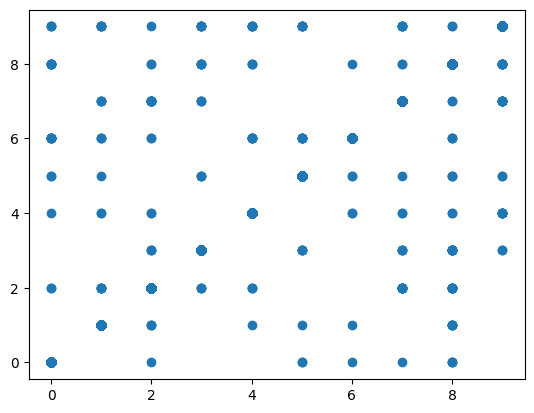

In [35]:
plt.scatter(np.argmax(model2.predict(x_test),axis=1),y_test)

In [39]:
np.sum(np.argmax(model2.predict(x_test),axis=1)==y_test)/len(y_test)

313/313 [==============================] - 4s 12ms/step


0.9774